https://www.kaggle.com/datasets/vivekgediya/banknote-authenticationcsv

About Dataset
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:

from google.colab import drive
drive.mount('/content/drive/')

from zipfile import ZipFile
file_name='/content/drive/MyDrive/archive.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()



Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#Checkpoint to see db loaded.

df=pd.read_csv('BankNote_Authentication.csv')
print(df.shape)
df.head(2)

(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [4]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Need to find correalation between the data

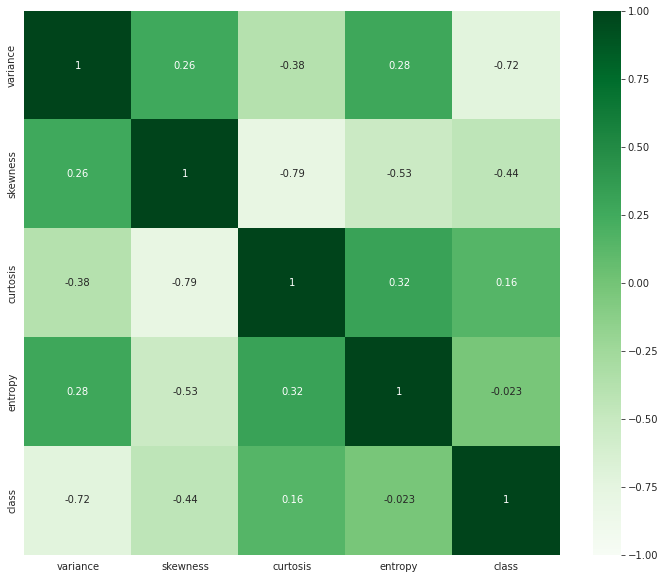

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, vmin =-1.0, cmap='Greens')
plt.show()

-0.72 , 0,79

Playing more with sns ,, #pairplot

<Figure size 1152x1152 with 0 Axes>

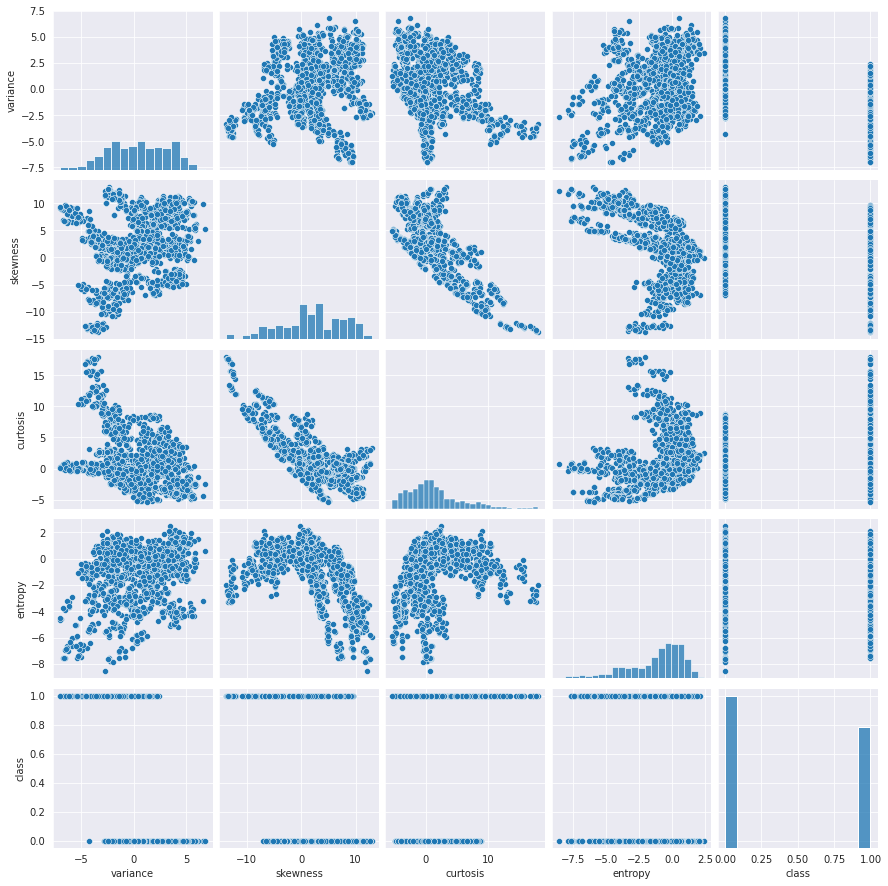

In [6]:
plt.figure(figsize=(16, 16))
sns.pairplot(df)
plt.show()

Variance , ,

density estimation for each variable,

In [7]:
y = df['class'].copy()
#making a copy of the database and drop some values
x = df.drop('class', axis= 1).copy()

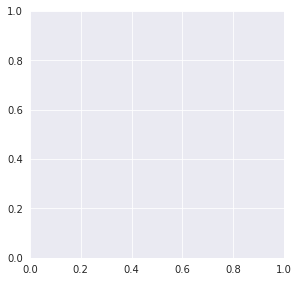

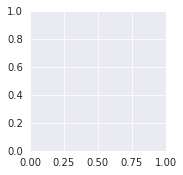

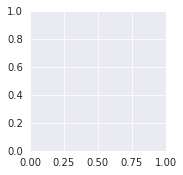

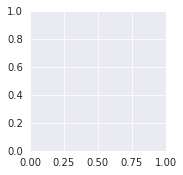

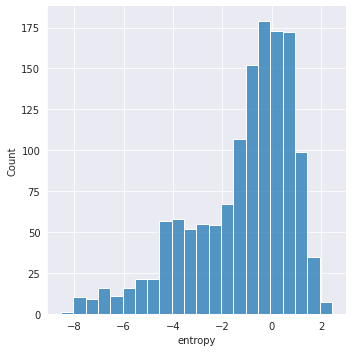

In [8]:
plt.figure(figsize= (10, 10))

for i in range (len (x.columns)):
  plt.subplot(2,2, i+1)
  sns.displot(x[x.columns[i]])
plt.show()

Hmm.. Entropy right skewed but why others not showing?


In [10]:
y.value_counts()

0    762
1    610
Name: class, dtype: int64

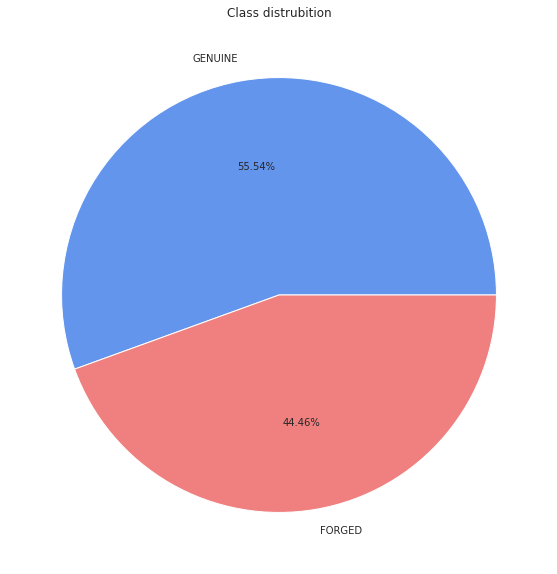

In [12]:


plt.figure(figsize = (10, 10))
plt.pie(y.value_counts(), labels =['GENUINE','FORGED'], autopct ='%.2f%%', colors=[ 'cornflowerblue', 'lightcoral'] )
plt.title('Class distrubition')
plt.show()

Preprocessing the Data


taking %70 of the file as train and enabling shuffle

In [28]:
X_train, X_test, y_train , y_test = train_test_split(x, y, train_size= 0.7, shuffle =True, random_state=1) 

In [29]:
X_train

,variance,skewness,curtosis,entropy
694,0.74054,0.36625,2.199200,0.484030
880,-2.35180,-4.83590,6.647900,-0.060358
1251,-0.77688,0.13036,-0.031137,-0.353890
812,-2.06590,1.05120,-0.462980,-1.097400
1212,-2.45600,-0.24418,1.404100,-0.458630
...,...,...,...,...
715,3.49160,8.57090,-3.032600,-0.591820
905,0.74521,3.63570,-4.404400,-4.141400
1096,-4.36670,6.06920,0.572080,-5.466800
235,2.04660,2.03000,2.176100,-0.083634


In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns =x.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = x.columns)


In [31]:
X_train

,variance,skewness,curtosis,entropy
694,0.105279,-0.279831,0.225994,0.788028
880,-0.998406,-1.188899,1.313246,0.528302
1251,-0.436302,-0.321052,-0.319095,0.388259
812,-0.896365,-0.160137,-0.424637,0.033532
1212,-1.035596,-0.386502,0.031673,0.338288
...,...,...,...,...
715,1.087157,1.153920,-1.052646,0.274743
905,0.106946,0.291501,-1.387911,-1.418754
1096,-1.717542,0.716752,-0.171671,-2.051099
235,0.571424,0.010907,0.220348,0.517197


In [32]:
type(X_train)

pandas.core.frame.DataFrame

nice


In [33]:
X_train.mean()

variance   -2.590520e-17
skewness    3.700743e-18
curtosis    4.625929e-17
entropy     7.864080e-17
dtype: float64

# Training

In [34]:
model = LogisticRegression()
model.fit (X_train, y_train)

LogisticRegression()

In [35]:
print( "Test ACC : {:.2f}% ".format(model.score(X_test, y_test)*100))

Test ACC : 97.82% 


it gives %97 .82 Acc on logistic regression model in test dataset.

In [37]:
y_prediction = model.predict(X_test)
cm = confusion_matrix(y_test, y_prediction)
clr = classification_report(y_test, y_prediction, target_names = ["GENUINE ", "FORGED"])



In [40]:
cm

array([[228,   7],
       [  2, 175]])

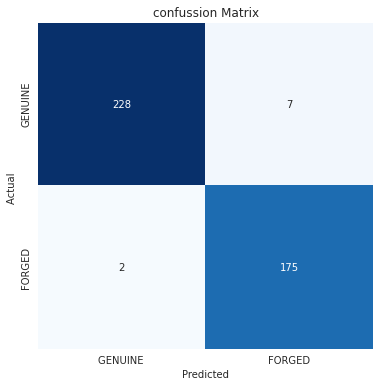

In [43]:
plt.figure(figsize =(6,6))

sns.heatmap( cm, annot= True, fmt= 'g', vmin=0, cmap = 'Blues', cbar = False)
plt.xticks(np.arange(2)+0.5, ["GENUINE ", "FORGED"])
plt.yticks(np.arange(2)+0.5, ["GENUINE", "FORGED"])
plt.xlabel('Predicted')
plt.ylabel('Actual ')
plt.title('confussion Matrix')
plt.show()

In [45]:
print("Report")
print(clr)

Report
              precision    recall  f1-score   support

    GENUINE        0.99      0.97      0.98       235
      FORGED       0.96      0.99      0.97       177

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

